In [1]:
library(ggplot2)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [23]:
options(repr.plot.width = 2, repr.plot.height = 2, repr.plot.res = 200)
theme_set(theme_bw())
theme_update(
    panel.background=element_blank(),
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    )

# Poisson

A poisson PMF is 
$$\frac{e^{-\lambda}\lambda^{x}}{x!}$$

Using the dpois function:

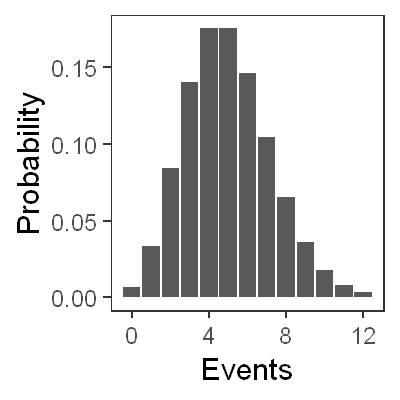

In [24]:
df = tibble(Probability=dpois(x = 0:12, lambda = 5), Events=0:12)

ggplot(data=df, aes(x = Events, y = Probability)) +
geom_bar(stat = "identity")

Using the PMF to get the probability of each number of events happening:

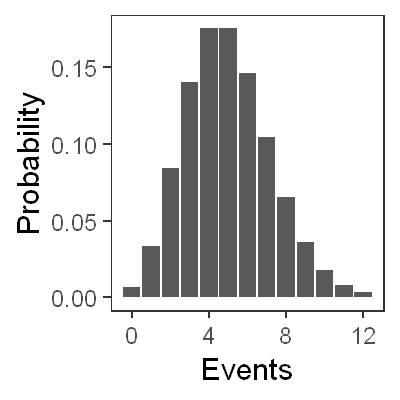

In [33]:
pois_pmf <- function(x, lambda) {
    exp(-lambda)*lambda^(x)/factorial(x)
}

events = 0:12
probs <- sapply(events, pois_pmf, lambda=5)

df = tibble(Probability=probs, Events=events)

ggplot(data=df, aes(x = Events, y = Probability)) +
geom_bar(stat = "identity")

Notes:
- We can see that PMF take the number events and output the probability of that many events happening given the assumed model (here a poisson model)